In [97]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import seaborn as sns


# Generic Functions to perform Naive Monte Carlo sim on ALL barrier option types

In [98]:
class BarrierOptionPricer:
    def __init__(self, S0, K, H, T, r, sigma, simulations=1000, steps=100):
        self.S0 = S0         # Spot price
        self.K = K           # Strike price
        self.H = H           # Barrier level
        self.T = T           # Time to maturity
        self.r = r           # Risk-free interest rate
        self.sigma = sigma   # Volatility
        self.simulations = simulations
        self.steps = steps

    def _simulate_paths(self):
        """Utility method to simulate price paths based on the Monte Carlo method."""
        dt = self.T / self.steps
        nudt = (self.r - 0.5* self.sigma **2)*dt
        volsdt = self.sigma *np.sqrt(dt)
        erdt = np.exp(self.r*dt)
        
        # Monte Carlo Method
        Z = np.random.normal(size=(self.steps, self.simulations))
        delta_St = nudt + volsdt*Z
        ST = self.S0*np.cumprod( np.exp(delta_St), axis=0)
        ST = np.concatenate( (np.full(shape=(1, self.simulations), fill_value=self.S0), ST ) )

        return ST
    
    
    # Vanilla Put Option
    def VanillaPutprice(self, Graph=True):
        """Method to price the vanilla put option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
        
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S,'b')
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Vanilla Put Option')
            plt.show()
    
        return C0, SE
    
    # Vanilla Call Option
    def VanillaCallprice(self, Graph=True):
        """Method to price the vanilla call option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
        
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S,'b')
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Vanilla Put Option')
            plt.show()
    
        return C0, SE
            
    # Up-and-Out Put Option
    def UOPutprice(self, Graph=True):
        """Method to price the up-and-out put option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST >= self.H, axis=0)
        ST[:,mask] = 0

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
        
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Up-and-Out Put Option')
            plt.show()
        
        return C0, SE
            
    # Up-and-In Put Option
    def UIPutprice(self, Graph=True):
        """Method to price the up-and-in put option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST >= self.H, axis=0)
        ST[:,~mask] = 0

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
    
        print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Up-and-In Put Option')
            plt.show()
        
        return C0, SE
            
    # Down-and-Out Put Option
    def DOPutprice(self, Graph=True):
        """Method to price the down-and-out put option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST <= self.H, axis=0)
        ST[:,mask] = 0

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
    
        print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-Out Put Option')
            plt.show()
    
        return C0, SE
    
    # Down-and-In Put Option
    def DIPutprice(self, Graph=True):
        """Method to price the down-and-in put option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST <= self.H, axis=0)
        ST[:,~mask] = 0

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
    
        print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-In Put Option')
            plt.show()
            
        return C0, SE
    
    # Up-and-Out Call Option
    def UOCallprice(self, Graph=True):
        """Utility method to price the up-and-out call option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST >= self.H, axis=0)
        ST[:,mask] = 0

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Up-and-Out Call Option')
            plt.show()
        
        return C0, SE
    
    # Up-and-In Call Option
    def UICallprice(self, Graph=True):
        """Utility method to price the up-and-in call option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST >= self.H, axis=0)
        ST[:,~mask] = 0

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
        
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Up-and-In Call Option')
            plt.show()
    
        return C0, SE
            
    # Down-and-Out Call Option
    def DOCallprice(self, Graph=True):
        """Method to price the down-and-out call option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST <= self.H, axis=0)
        ST[:,mask] = 0

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
    
        print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-Out Call Option')
            plt.show()
        
        return C0, SE
            
    # Down-and-In Call Option
    def DICallprice(self, Graph=True):
        """Method to price the down-and-in call option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST <= self.H, axis=0)
        ST[:,~mask] = 0

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
    
        print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-In Call Option')
            plt.show()
        
        return C0, SE

### Example usage:

Call value is $0.14 with SE +/- 0.084
Computation time is:  0.029


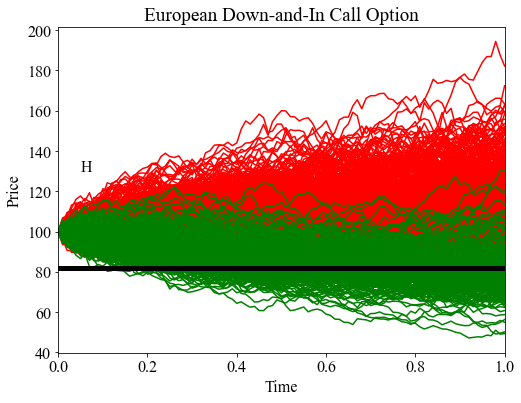

In [99]:
option_pricer = BarrierOptionPricer(S0=100, K=100, H=82, T=1, r=0.01, sigma=0.2, simulations= 1000, steps=100)

DownOut = option_pricer.DICallprice(Graph=True)

# Importance Sampling of 'Down' European Calls

### Naive montecarlo functions and importance sampling functions

In [113]:
class NaiveBarrierOptionPricer:
    def __init__(self, S0, K, H, T, r, sigma, q=0, simulations=1000, steps=100):
        self.S0 = S0         # Spot price
        self.K = K           # Strike price
        self.H = H           # Barrier level
        self.T = T           # Time to maturity
        self.r = r           # Risk-free interest rate
        self.q = q           # Dividend yield
        self.sigma = sigma   # Volatility
        self.simulations = simulations
        self.steps = steps

    def _simulate_paths(self):
        """Utility method to simulate price paths based on the Monte Carlo method."""
        dt = self.T / self.steps
        nudt = ((self.r - self.q) - 0.5 * self.sigma ** 2) * dt
        volsdt = self.sigma * np.sqrt(dt)
        
        # Monte Carlo simulation
        Z = np.random.normal(size=(self.steps, self.simulations))
        delta_St = nudt + volsdt * Z
        ST = self.S0 * np.cumprod(np.exp(delta_St), axis=0)
        ST = np.concatenate((np.full(shape=(1, self.simulations), fill_value=self.S0), ST))
        return ST
    
    # Closed-form solution for Down-and-out call option from the Hull Textbook (2002)
    def ClosedForm_Option_Hull(self):
        if self.H <= self.K:
            # Pricing a Down and In Call Option
            lambd = (self.r - self.q + 0.5 * self.sigma**2) / (self.sigma**2)
            
            y = (np.log(self.H**2 / (self.S0 * self.K)) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            
            DI_term1 = self.S0 * np.exp(-self.q * self.T) * ((self.H / self.S0) ** (2 * lambd)) * norm.cdf(y)
            DI_term2 = self.K * np.exp(-self.r * self.T) * ((self.H / self.S0) ** (2 * lambd - 2)) * norm.cdf(y - self.sigma * np.sqrt(self.T))
            
            C_di = DI_term1 - DI_term2
            
            # Pricing a Vanilla Call
            d1 = (np.log(self.S0 / self.K) + (self.r - self.q + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
            d2 = d1 - self.sigma * np.sqrt(self.T)
            
            C = self.S0 * np.exp(-self.q * self.T) * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
            
            C_do = C - C_di
            
            return C_di, C_do
        
        else:
            lambd = (self.r - self.q + 0.5 * self.sigma**2) / (self.sigma**2)
            
            x1 = (np.log(self.S0 / self.H) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            x2 = x1 - self.sigma * np.sqrt(self.T)
            
            y1 = (np.log(self.H / self.S0) / (self.sigma * np.sqrt(self.T))) + lambd * self.sigma * np.sqrt(self.T)
            y2 = y1 - self.sigma * np.sqrt(self.T)
            
            term1 = self.S0 * np.exp(-self.q * self.T) * norm.cdf(x1)
            term2 = self.K * np.exp(-self.r * self.T) * norm.cdf(x2)
            term3 = self.S0 * np.exp(-self.q * self.T) * ((self.H / self.S0) ** (2 * lambd)) * norm.cdf(y1)
            term4 = self.K * np.exp(-self.r * self.T) * ((self.H / self.S0) ** (2 * lambd - 2)) * norm.cdf(y2)

            C_do = term1 - term2 - term3 + term4
            
            # Pricing a Vanilla Call
            d1 = (np.log(self.S0 / self.K) + (self.r - self.q + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
            d2 = d1 - self.sigma * np.sqrt(self.T)
            
            C = self.S0 * np.exp(-self.q * self.T) * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
            
            C_di = C - C_do
            
            return C_di, C_do

    # Vanilla Call Option
    def VanillaCallprice(self, ST, Graph=True):
        """Method to price the vanilla call option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        S = ST.copy()

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-(self.r - self.q) *self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(- (self.r - self.q) *self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)    
        
        comp_time = time.time() - start_time

        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S,'b')
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Vanilla Put Option')
            plt.show()
    
        return C0, SE, comp_time
    
    def DOCallprice(self, paths, Graph=True):
        """Method to price the down-and-out call option."""
        start_time = time.time()

        # Apply Barrier Condition to ST numpy array
        ST = paths.copy()
        
        # Mask to identify paths that breach the barrier
        barrier_breached = np.any(ST <= self.H, axis=0)
        # Mask to identify paths that are in-the-money at maturity
        final_price_above_strike = ST[-1] > self.K
        
        # Combine masks to identify successful paths
        successful_paths = ~barrier_breached & final_price_above_strike
        
        # Zero out paths that breach the barrier
        ST[:, barrier_breached] = 0

        # Calculate payoffs for successful paths
        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r * self.T) * np.sum(CT) / self.simulations

        # Calculate standard error
        sigma = np.std(np.exp(-self.r * self.T) * CT)
        SE = sigma / np.sqrt(self.simulations)
        
        comp_time = time.time() - start_time
        
        if Graph:
            plt.figure(figsize=(16, 6)) 
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            # First subplot: Path Visualization
            plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
            
            # Plot paths that breach the barrier (red)
            plt.plot(np.linspace(0, self.T, self.steps + 1), paths[:, ~successful_paths], 'r', alpha=0.5)
            # Plot successful paths (green)
            plt.plot(np.linspace(0, self.T, self.steps + 1), paths[:, successful_paths], 'g', alpha=0.7)
            # Plot the barrier
            plt.plot([0, self.T], [self.H, self.H], 'k-', linewidth=2.0, label="Barrier (H)")
            plt.annotate('H', (0.05, self.H + 0.1 * self.H))
            plt.xlim(0, self.T)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-Out Call Option')
            plt.legend()
            
            # Second subplot: Payoff Distribution
            plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
            Dist = np.exp(-self.r * self.T) * CT      
            plt.hist(Dist, bins=50, color='b', edgecolor='k', alpha=0.7)
            plt.xlabel('Price')
            plt.ylabel('Frequency')
            plt.title('Down-and-Out Call Option Price Distribution')
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        
        return C0, SE, comp_time


    def DICallprice(self, paths, Graph=True):
        """Method to price the down-and-in call option."""
        start_time = time.time()

        # Apply Barrier Condition to ST numpy array
        ST = paths.copy()
        
        # Mask to identify paths that breach the barrier
        barrier_breached = np.any(ST <= self.H, axis=0)
        # Mask to identify paths that are in-the-money at maturity
        final_price_above_strike = ST[-1] > self.K
        
        # Combine masks to identify successful paths
        successful_paths = barrier_breached & final_price_above_strike
        
        # Zero out paths that do not breach the barrier
        ST[:, ~barrier_breached] = 0

        # Calculate payoffs for successful paths
        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-(self.r - self.q) * self.T) * np.sum(CT) / self.simulations

        # Calculate standard error
        sigma = np.std(np.exp(-(self.r - self.q) * self.T) * CT)
        SE = sigma / np.sqrt(self.simulations)
        
        comp_time = time.time() - start_time
        
        if Graph:
            plt.figure(figsize=(16, 6))  # Increase the width to accommodate two subplots
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            # First subplot: Path Visualization
            plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
            
            # Plot paths that are not successful in red
            plt.plot(np.linspace(0, self.T, self.steps + 1), paths[:, ~successful_paths], 'r', alpha=0.5)
            # Plot successful paths in green
            plt.plot(np.linspace(0, self.T, self.steps + 1), paths[:, successful_paths], 'g', alpha=0.7)
            # Plot the barrier
            plt.plot([0, self.T], [self.H, self.H], 'k-', linewidth=2.0, label="Barrier (H)")
            plt.annotate('H', (0.05, self.H + 0.1 * self.H))
            plt.xlim(0, self.T)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-In Call Option')
            plt.legend()
            
            # Second subplot: Payoff Distribution
            plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
            Dist = np.exp(-(self.r - self.q) * self.T) * CT      
            plt.hist(Dist, bins=50, color='b', edgecolor='k', alpha=0.7)
            plt.xlabel('Price')
            plt.ylabel('Frequency')
            plt.title('Down-and-In Call Option Price Distribution')
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        
        return C0, SE, comp_time

class ImportanceSamplingBarrierOptionPricer:
    def __init__(self, S0, K, H, T, r, sigma, q=0, simulations=1000, steps=100):
        self.S0 = S0         # Spot price
        self.K = K           # Strike price
        self.H = H           # Barrier level
        self.T = T           # Time to maturity
        self.r = r           # Risk-free interest rate
        self.q = q           # Dividend yield
        self.sigma = sigma   # Volatility
        self.simulations = simulations
        self.steps = steps

    def DO_Naive_MonteCarlo(self, Graph=True):
        start_time = time.time()
        
        dt = self.T / self.steps
        times = np.linspace(0, self.T, self.steps + 1)
        normals = np.random.normal(loc=dt*(self.r - 0.5 * self.sigma**2), scale=np.sqrt(dt)*self.sigma, size=(self.simulations, self.steps))
        L = np.cumsum(normals, axis=1)
        L = np.concatenate((np.zeros((self.simulations, 1)), L), axis=1)
        S = self.S0 * np.exp(L)
        
        vanilla_mc_option_payoff_active = np.any(S < self.H, axis=1) & (S[:,-1] > self.K)
        vanilla_mc_payoffs = np.maximum(0, S[:, -1] - self.K) * np.exp(-self.r * self.T) * vanilla_mc_option_payoff_active
        vanilla_mc_estimated_price = np.mean(vanilla_mc_payoffs)
        vanilla_mc_std_err = np.std(vanilla_mc_payoffs) / np.sqrt(self.simulations)
        
        vanilla_mc_df = pd.DataFrame(S.T)
        vanilla_mc_df['times'] = times
        vanilla_mc_df = pd.melt(vanilla_mc_df, id_vars='times')
        vanilla_mc_df['variable'] = vanilla_mc_df['variable'].astype(np.int64)
        vanilla_mc_df['option_payoff_active'] = vanilla_mc_option_payoff_active[vanilla_mc_df['variable'].values]

        print('*Naive MC*')
        print('Total number of paths: {}'.format(self.simulations))
        print('Number of paths with positive payoff: {}'.format(np.sum(vanilla_mc_option_payoff_active)))
        print('Estimated price: {} +- {}'.format(round(vanilla_mc_estimated_price, 2), round(vanilla_mc_std_err, 2)))
        print('Computation Time: ', round(time.time()-start_time, 2))
        print('\n-------------------------\n')
        
        sns.lineplot(x='times', y='value', units='variable', hue='option_payoff_active', estimator=None, lw=1., data=vanilla_mc_df, legend=False)

    def DI_Call_Price(self, Graph=True):
        start_time = time.time()
        
        dt = self.T / self.steps
        times = np.linspace(0, self.T, self.steps + 1)
        
        b = -np.log(self.H / self.S0)
        c = np.log(self.K / self.S0)
        
        theta_minus = 0.5 - self.r / self.sigma**2 - (2*b+c) / float(self.T * self.sigma**2)
        theta_plus = 0.5 - self.r / self.sigma**2 + (2*b+c) / float(self.T * self.sigma**2)
        psi_theta_plus = (self.r - 0.5 * self.sigma**2) * dt * theta_plus + 0.5 * self.sigma**2 * dt * theta_plus**2
        
        pos_new_mean = (2*b+c)/self.T
        neg_new_mean = -(2*b+c)/self.T

        normals = np.random.normal(loc=dt*neg_new_mean, scale=np.sqrt(dt)*self.sigma, size=(self.simulations, self.steps))
        L = np.cumsum(normals, axis=1)
        L = np.concatenate((np.zeros((self.simulations, 1)), L), axis=1)
        S_tilde = self.S0 * np.exp(L)
        below_knockin = S_tilde < self.H
        
        taus = np.zeros(self.simulations, dtype=np.int64)
        
        for i in range(0, self.simulations):
            tau = np.argmax(below_knockin[i,:])
            
            start_of_new_normals = self.steps
            
            if tau == 0:
                taus[i] = self.steps
            else:
                start_of_new_normals = tau + 1
                taus[i] = tau
            
            if start_of_new_normals < self.steps:
                number_required = self.steps - start_of_new_normals
                normals[i,start_of_new_normals:] = np.random.normal(loc=dt*pos_new_mean, scale=np.sqrt(dt)*self.sigma, size=number_required)

        L = np.cumsum(normals, axis=1)
        L = np.concatenate((np.zeros((self.simulations, 1)), L), axis=1)
        S = self.S0 * np.exp(L)
        
        LR = np.zeros(self.simulations)
        
        for i in range(0, self.simulations):
            L_tau = L[i,taus[i]]
            L_m = L[i,-1]
            LR[i] = np.exp((theta_plus - theta_minus) * L_tau - theta_plus * L_m + self.steps * psi_theta_plus)
        
        #Calculating Down-and-in Call
        down_in_option_payoff_active = np.any(S < self.H, axis=1) & (S[:,-1] > self.K)
        down_in_mc_payoffs = np.maximum(0, S[:, -1] - self.K) * np.exp(-self.r * self.T) * np.multiply(LR, down_in_option_payoff_active)
        importance_mc_estimated_price = np.mean(down_in_mc_payoffs)
        importance_mc_std_err = np.std(down_in_mc_payoffs) / np.sqrt(self.simulations)
        
        '''
        #Calculating Vanilla Call
        vanilla_option_payoff_active = S[:,-1] > self.K
        vanilla_mc_payoffs = np.maximum(0, S[:, -1] - self.K) * np.exp(-self.r * self.T) * vanilla_option_payoff_active
        
        # Using parity relation to Calculate Down-and-out Call
        down_out_mc_payoffs = vanilla_mc_payoffs - importance_mc_payoffs
        importance_mc_estimated_price = np.mean(vanilla_mc_payoffs) - np.mean(importance_mc_payoffs)
        importance_mc_std_err = np.std(down_out_mc_payoffs) / np.sqrt(self.simulations)
        
        importance_mc_option_payoff_active = np.any(S > self.H, axis=1) & (S[:,-1] > self.K) # For plotting purposes
        '''
        if Graph:
            plt.figure(figsize=(16, 6)) 
            
            # Subplot 1: Path Visualization
            plt.subplot(1, 2, 1)
            sns.lineplot(x='times', y='value', units='variable', hue='option_payoff_active',
                        estimator=None, lw=1., data=importance_mc_df, legend=False, alpha=0.7)
            plt.axhline(self.H, color='k', linestyle='--', label='Barrier (H)')
            plt.title("Importance Sampling: Paths")
            plt.xlabel("Time")
            plt.ylabel("Price")
            plt.legend(loc="upper left")
            
            # Subplot 2: Payoff Distribution
            plt.subplot(1, 2, 2)
            payoff_dist = np.exp(-self.r * self.T) * np.maximum(0, S[:, -1] - self.K) * down_in_option_payoff_active
            plt.hist(payoff_dist, bins=50, color='blue', edgecolor='black', alpha=0.7)
            plt.title("Payoff Distribution")
            plt.xlabel("Price")
            plt.ylabel("Frequency")
            plt.grid(True)
            
            plt.tight_layout()
            plt.show()
            
        return importance_mc_estimated_price, importance_mc_std_err, time.time()-start_time

'''
    # Importance Sampling path simulation
    def DO_Call_Price(self, Graph=True):
        """Method to price the down-and-out call option using importance sampling."""
        start_time = time.time()
        
        dt = self.T / self.steps
        b = -np.log(self.H / self.S0)
        c = np.log(self.K / self.S0)
        
        # Calculate optimal drift adjustments for importance sampling
        theta_minus = 0.5 - (self.r - self.q) / self.sigma**2 - (2 * b + c) / (self.T * self.sigma**2)
        theta_plus = 0.5 - (self.r - self.q) / self.sigma**2 + (2 * b + c) / (self.T * self.sigma**2)
        psi_theta_plus = ((self.r - self.q) - 0.5 * self.sigma**2) * dt * theta_plus + 0.5 * self.sigma**2 * dt * theta_plus**2
        
        pos_new_mean = (2 * b + c) / self.T
        neg_new_mean = -(2 * b + c) / self.T
        
        normals = np.random.normal(loc= dt * neg_new_mean, scale= np.sqrt(dt) * self.sigma, size=( self.steps, self.simulations))
        L = np.cumsum(normals, axis=0)
        L = np.concatenate((np.zeros((1, self.simulations)), L), axis=0)
        S_tau = self.S0 * np.exp(L)
        
        barrier = S_tau < self.H
        taus = np.full(self.simulations, self.steps, dtype=np.int64)

        
        for i in range(0, self.simulations):
            tau = np.argmax(barrier[:, i])
            start_of_new_normals = self.steps
            
            if tau > 0:
                taus[i] = tau
                start_of_new_normals = tau + 1
            
            if start_of_new_normals < self.steps:
                number_required = self.steps - start_of_new_normals
                normals[start_of_new_normals:, i] = np.random.normal(loc= dt * pos_new_mean, scale= np.sqrt(dt) * self.sigma, size=number_required)
                
        L = np.cumsum(normals, axis = 0)
        L = np.concatenate((np.zeros((1, self.simulations)), L), axis=0)
        ST = self.S0 * np.exp(L) 


        LR = np.zeros(self.simulations)
        
        for i in range(0, self.simulations):
            L_tau = L[taus[i], i]
            L_m = L[-1, i]
            LR[i] = np.exp(- theta_minus * L_tau - theta_plus * (L_m - L_tau) * self.steps * psi_theta_plus)
        
        IS_MC_active_options = np.any(ST < self.H, axis=0) & (ST[-1, :] > self.K)    
        IS_MC_payoffs = np.maximum(0, ST[-1, :] - self.K) * np.exp(-self.r * self.T) * np.multiply(LR, IS_MC_active_options)
        IS_MC_C0 = np.mean(IS_MC_payoffs)
        IS_MC_SE = np.std(IS_MC_payoffs) / np.sqrt(self.simulations)

        print('*Importance sampling MC*')
        print('Total number of paths: {}'.format(self.simulations))
        print('Number of paths with positive payoff: {}'.format(np.sum(IS_MC_active_options)))
        print('Estimated price: {} +- {}'.format(IS_MC_C0, IS_MC_SE))
        print('\n-------------------------\n')
        

        IS_MC_option_payoffs = np.maximum(0, self.K - S[-1][S[-1] != 0])
        IS_MC_C0 = np.exp(-self.r*self.T)*np.sum(IS_MC_option_payoffs)/self.simulations
        IS_MC_SE = np.std(np.exp(-self.r*self.T)*IS_MC_option_payoffs) / np.sqrt(self.simulations)

        
        IS_MC_df = pd.DataFrame(ST)
        times = np.linspace(0, self.T, self.steps + 1)
        IS_MC_df['times'] = times
        IS_MC_df = pd.melt(IS_MC_df, id_vars='times')
        IS_MC_df['variable'] = IS_MC_df['variable'].astype(np.int64)
        IS_MC_df['option_payoff_active'] = IS_MC_active_options[IS_MC_df['variable'].values]
        
        sns.lineplot(x='times', y='value', units='variable', hue='option_payoff_active', estimator=None, lw=1., data=IS_MC_df, legend=False)
        plt.ylabel('S(t)')
        plt.xlabel('Time (t)')
        plt.show() 
        
        return ST'''

'\n    # Importance Sampling path simulation\n    def DO_Call_Price(self, Graph=True):\n        """Method to price the down-and-out call option using importance sampling."""\n        start_time = time.time()\n        \n        dt = self.T / self.steps\n        b = -np.log(self.H / self.S0)\n        c = np.log(self.K / self.S0)\n        \n        # Calculate optimal drift adjustments for importance sampling\n        theta_minus = 0.5 - (self.r - self.q) / self.sigma**2 - (2 * b + c) / (self.T * self.sigma**2)\n        theta_plus = 0.5 - (self.r - self.q) / self.sigma**2 + (2 * b + c) / (self.T * self.sigma**2)\n        psi_theta_plus = ((self.r - self.q) - 0.5 * self.sigma**2) * dt * theta_plus + 0.5 * self.sigma**2 * dt * theta_plus**2\n        \n        pos_new_mean = (2 * b + c) / self.T\n        neg_new_mean = -(2 * b + c) / self.T\n        \n        normals = np.random.normal(loc= dt * neg_new_mean, scale= np.sqrt(dt) * self.sigma, size=( self.steps, self.simulations))\n        L =

### Checking if Parity holds: C_do + C_di = C_vanilla

In [101]:
#plot Down and In Call Option
option_pricer = NaiveBarrierOptionPricer(S0=100, K=100, H=85, T=0.2, r=0.1, sigma=0.3, q=0, simulations=10000, steps=50)
#Generate Monte Carlo paths
path = option_pricer._simulate_paths()

DO_price = option_pricer.DOCallprice(path, Graph=False)
DI_price = option_pricer.DICallprice(path, Graph=False)
Vanilla = option_pricer.VanillaCallprice(path, Graph=False)

print("Down-and-Out Call Price: €", round(DO_price[0], 2), "±", round(DO_price[1], 2), "       Computation Time: ", round(DO_price[2], 2))
print("-------------------------------------------------------------------------------")
print("Down-and-In Call Price: €", round(DI_price[0], 2), "±", round(DI_price[1], 2), "       Computation Time: ", round(DI_price[2], 2))
print("Vanilla Call Price: €", round(Vanilla[0], 2), "±", round(Vanilla[1], 2), "       Computation Time: ", round(Vanilla[2], 2))
print("\n")

# Check if the sum of DO and DI prices equals the vanilla price
sum_DO_DI = round(DO_price[0] + DI_price[0], 2)
print("Sum of DO and DI Prices: €", sum_DO_DI)
print("Does DO + DI equal Vanilla?", sum_DO_DI == round(Vanilla[0], 2))

Down-and-Out Call Price: € 6.28 ± 0.09        Computation Time:  0.01
-------------------------------------------------------------------------------
Down-and-In Call Price: € 0.02 ± 0.01        Computation Time:  0.0
Vanilla Call Price: € 6.3 ± 0.09        Computation Time:  0.0


Sum of DO and DI Prices: € 6.3
Does DO + DI equal Vanilla? True


### Analysing Path trajectories for Down-and-in & Down-and-out

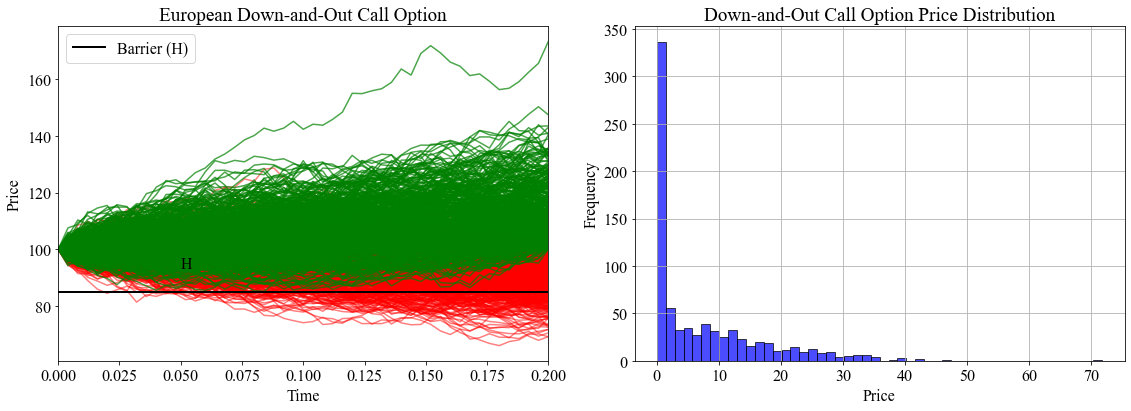

In [102]:
option_pricer = NaiveBarrierOptionPricer(S0=100, K=100, H=85, T=0.2, r=0.1, sigma=0.3, q=0, simulations=1000, steps=50)
path = option_pricer._simulate_paths()
DownOut = option_pricer.DOCallprice(path, Graph=True)

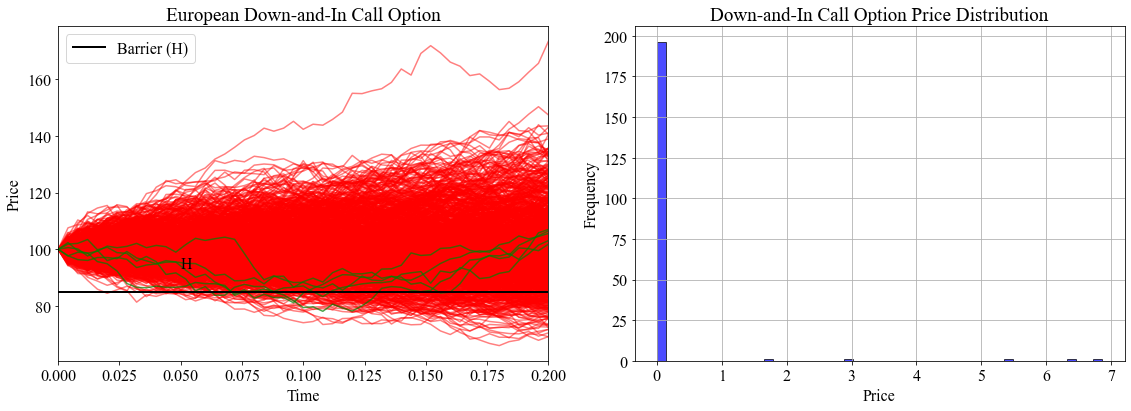

In [103]:
DownOut = option_pricer.DICallprice(path, Graph=True)

For the Down-and-in montecasrol simulation, most of the trajectories end up as a Zero-payoff option. Hence there is a lot of computational efforts lost in the simulation process. Motivates changing the drift term of the underlying price change, AKA importance sampling. 

### Investigating Variance of Naive Monte Carlo Estimates

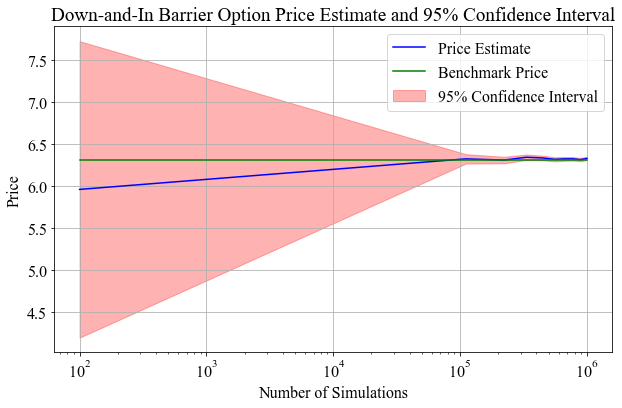

In [104]:
# PLot the confidence interval and the price estimate for a down and out barrier option with different amounts of simulaitons
simulations = np.linspace(100, 1000000, 10)

prices = []
LB_95 = []
UB_95 = []

for simulation in simulations:
    option_pricer = NaiveBarrierOptionPricer(S0=100, K=102, H=92, T=0.2, r=0.1, sigma=0.3, q= 0, simulations= int(simulation), steps=50)
    path = option_pricer._simulate_paths()
    price = option_pricer.DOCallprice(path, Graph=False)
    prices.append(price[0])
    LB_95.append(price[0] - 1.96 * price[1])
    UB_95.append(price[0] + 1.96 * price[1])

benchmark_price = option_pricer.ClosedForm_Option_Hull()
benchmark_prices = [benchmark_price[1]] * len(simulations)
 
plt.figure(figsize=(10,6))
plt.plot(simulations, prices, 'b', label='Price Estimate')
plt.plot(simulations, benchmark_prices, 'g', label='Benchmark Price')
plt.fill_between(simulations, LB_95, UB_95, color='r', alpha=0.3, label='95% Confidence Interval')
plt.xscale('log')
plt.xlabel('Number of Simulations')
plt.ylabel('Price')
plt.title('Down-and-In Barrier Option Price Estimate and 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

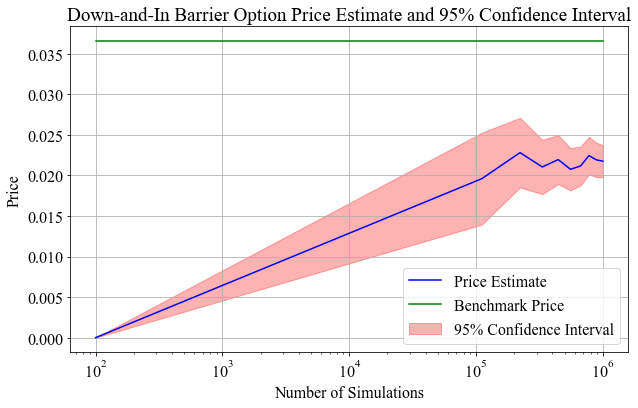

In [105]:
# PLot the confidence interval and the price estimate for a down and out barrier option with different amounts of simulaitons
simulations = np.linspace(100, 1000000, 10)

prices = []
LB_95 = []
UB_95 = []

for simulation in simulations:
    option_pricer = NaiveBarrierOptionPricer(S0=100, K=102, H=92, T=0.2, r=0.1, sigma=0.3, q= 0, simulations= int(simulation), steps=50)
    path = option_pricer._simulate_paths()
    price = option_pricer.DICallprice(path, Graph=False)
    prices.append(price[0])
    LB_95.append(price[0] - 1.96 * price[1])
    UB_95.append(price[0] + 1.96 * price[1])

benchmark_price = option_pricer.ClosedForm_Option_Hull()
benchmark_prices = [benchmark_price[0]] * len(simulations)
 
plt.figure(figsize=(10,6))
plt.plot(simulations, prices, 'b', label='Price Estimate')
plt.plot(simulations, benchmark_prices, 'g', label='Benchmark Price')
plt.fill_between(simulations, LB_95, UB_95, color='r', alpha=0.3, label='95% Confidence Interval')
plt.xscale('log')
plt.xlabel('Number of Simulations')
plt.ylabel('Price')
plt.title('Down-and-In Barrier Option Price Estimate and 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

The plot shows that montecarlo simulations of Down and in calls don't converge to the closed form solution quickly because too few trajectories are actually activiating the barrier.

### Sensitivity Analysis of Down-and-In Variance for different Strike prices (K) and Barrier levels (H)

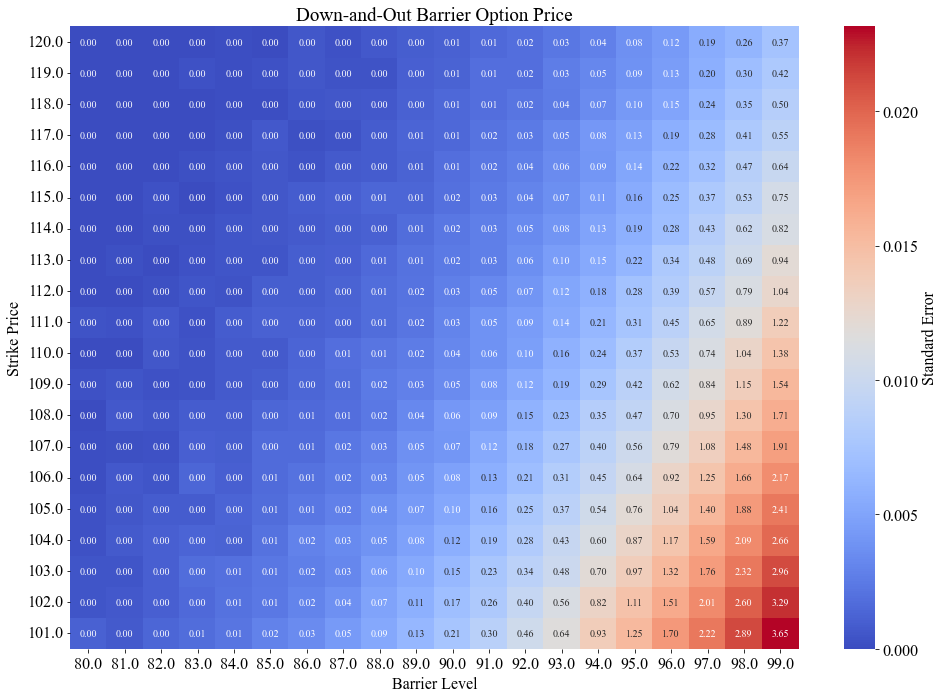

In [106]:
# Define strike prices and barrier levels
Ks = np.linspace(101, 120, 20)
Hs = np.linspace(80, 99, 20)

# Initialize arrays for prices and standard errors
prices = np.zeros((len(Ks), len(Hs)))
stderrors = np.zeros((len(Ks), len(Hs)))

# Monte Carlo simulation for each combination of K and H
for i, K in enumerate(Ks):
    for j, H in enumerate(Hs):
        option_pricer = NaiveBarrierOptionPricer(S0=100, K=K, H=H, T=0.2, r=0.1, sigma=0.3, q=0, simulations=100000, steps=50)
        path = option_pricer._simulate_paths()
        price = option_pricer.DICallprice(path, Graph=False)
        prices[i, j] = round(price[0], 2)  # Round price to nearest cent
        stderrors[i, j] = price[1]  # Round standard error to nearest cent

# Create a heatmap for the prices
plt.figure(figsize=(14, 10))
sns.heatmap(
    stderrors,  # Use standard errors for shading
    xticklabels=np.round(Hs),  # Format barrier levels
    yticklabels=np.round(Ks),  # Format strike prices
    annot=prices,  # Annotate the heatmap with prices
    fmt='.2f',  # Format the annotations
    cmap='coolwarm',  # Color map for shading
    annot_kws={'size': 10},  # Annotation styling
    cbar_kws={'label': 'Standard Error'},  # Label for the color bar
)
plt.xlabel('Barrier Level')
plt.ylabel('Strike Price')
plt.title('Down-and-In Barrier Option Price')

# Invert the y-axis
plt.gca().invert_yaxis()

# Display the heatmap
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()

### Importance Sampling Of a Deep out of the money Down-and-in

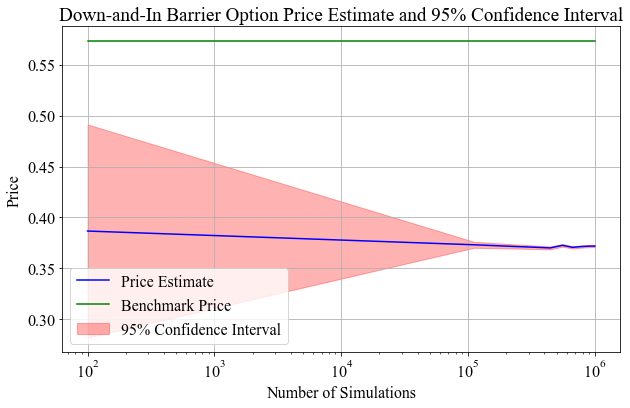

In [119]:
# PLot the confidence interval and the price estimate for a down and out barrier option with different amounts of simulaitons
simulations = np.linspace(100, 1000000, 10)

prices = []
LB_95 = []
UB_95 = []

for simulation in simulations:
    option_pricer = ImportanceSamplingBarrierOptionPricer(S0=100, K=102, H=92, T=0.2, r=0.1, sigma=0.3, q= 0, simulations= int(simulation), steps=50)
    price = option_pricer.DI_Call_Price(Graph=False)
    prices.append(price[0])
    LB_95.append(price[0] - 1.96 * price[1])
    UB_95.append(price[0] + 1.96 * price[1])

option_pricer = NaiveBarrierOptionPricer(S0=100, K=102, H=92, T=0.2, r=0.1, sigma=0.3, q= 0, simulations=1, steps=50)
benchmark_price = option_pricer.ClosedForm_Option_Hull()
benchmark_prices = [benchmark_price[0]] * len(simulations)
 
plt.figure(figsize=(10,6))
plt.plot(simulations, prices, 'b', label='Price Estimate')
plt.plot(simulations, benchmark_prices, 'g', label='Benchmark Price')
plt.fill_between(simulations, LB_95, UB_95, color='r', alpha=0.3, label='95% Confidence Interval')
plt.xscale('log')
plt.xlabel('Number of Simulations')
plt.ylabel('Price')
plt.title('Down-and-In Barrier Option Price Estimate and 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define strike prices and barrier levels
Ks = np.linspace(101, 120, 20)
Hs = np.linspace(80, 99, 20)

# Initialize arrays for prices and standard errors
prices = np.zeros((len(Ks), len(Hs)))
stderrors = np.zeros((len(Ks), len(Hs)))

# Monte Carlo simulation for each combination of K and H
for i, K in enumerate(Ks):
    for j, H in enumerate(Hs):
        option_pricer = ImportanceSamplingBarrierOptionPricer(S0=100, K=K, H=H, T=0.2, r=0.1, sigma=0.3, q=0, simulations=100000, steps=50)
        price = option_pricer.DICallprice(Graph=False)
        prices[i, j] = round(price[0], 2)  # Round price to nearest cent
        stderrors[i, j] = price[1]  # Round standard error to nearest cent

# Create a heatmap for the prices
plt.figure(figsize=(14, 10))
sns.heatmap(
    stderrors,  # Use standard errors for shading
    xticklabels=np.round(Hs),  # Format barrier levels
    yticklabels=np.round(Ks),  # Format strike prices
    annot=prices,  # Annotate the heatmap with prices
    fmt='.2f',  # Format the annotations
    cmap='coolwarm',  # Color map for shading
    annot_kws={'size': 10},  # Annotation styling
    cbar_kws={'label': 'Standard Error'},  # Label for the color bar
)
plt.xlabel('Barrier Level')
plt.ylabel('Strike Price')
plt.title('Down-and-In Barrier Option Price')

# Invert the y-axis
plt.gca().invert_yaxis()

# Display the heatmap
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()

In [121]:
option_pricer = ImportanceSamplingBarrierOptionPricer(S0=100, K=102, H=92, T=0.2, r=0.1, sigma=0.3, q=0, simulations=1000000, steps=50)
IS_DI_price = option_pricer.DI_Call_Price(Graph=False)

print("Down-and-In Call Price: €", round(IS_DI_price[0], 2), "±", round(IS_DI_price[1], 2), "       Computation Time: ", round(IS_DI_price[2], 2))

Down-and-In Call Price: € 0.37 ± 0.0        Computation Time:  37.66


*Importance sampling MC*
Total number of paths: 100000
Number of paths with positive payoff: 34444
Estimated price: 0.0 +- 0.0
Computation Time:  3.5

-------------------------



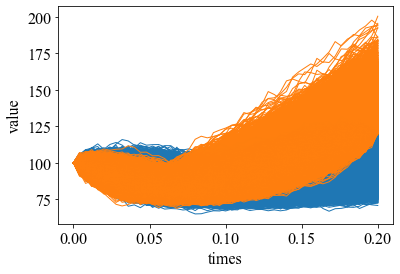

In [111]:
option_pricer = ImportanceSamplingBarrierOptionPricer(S0=100, K=102, H=92, T=0.2, r=0.1, sigma=0.3, q=0, simulations=50000, steps=50)
IS_DI_price = option_pricer.DI_Call_Price(Graph=True)